<a href="https://colab.research.google.com/github/AhgallyahViswanathan/Analyzing_Facebook_Ego_Networks_with_Graph_Analytics/blob/main/Analyzing_Facebook_Ego_Networks_with_Graph_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

Mounted at /content/drive
Error: Not a gzipped file (b'0 ')
File is not a valid Gzip file. Trying without gzip compression...
   start_node  end_node
0           0         1
1           0         2
2           0         3
3           0         4
4           0         5
Number of duplicate rows: 0

[INFO] Ego-Network of Node 107
Number of nodes: 1046
Number of edges: 27795
Graph Density: 0.05085676123212603
Average Degree: 53.1453154875717
Number of connected components: 1


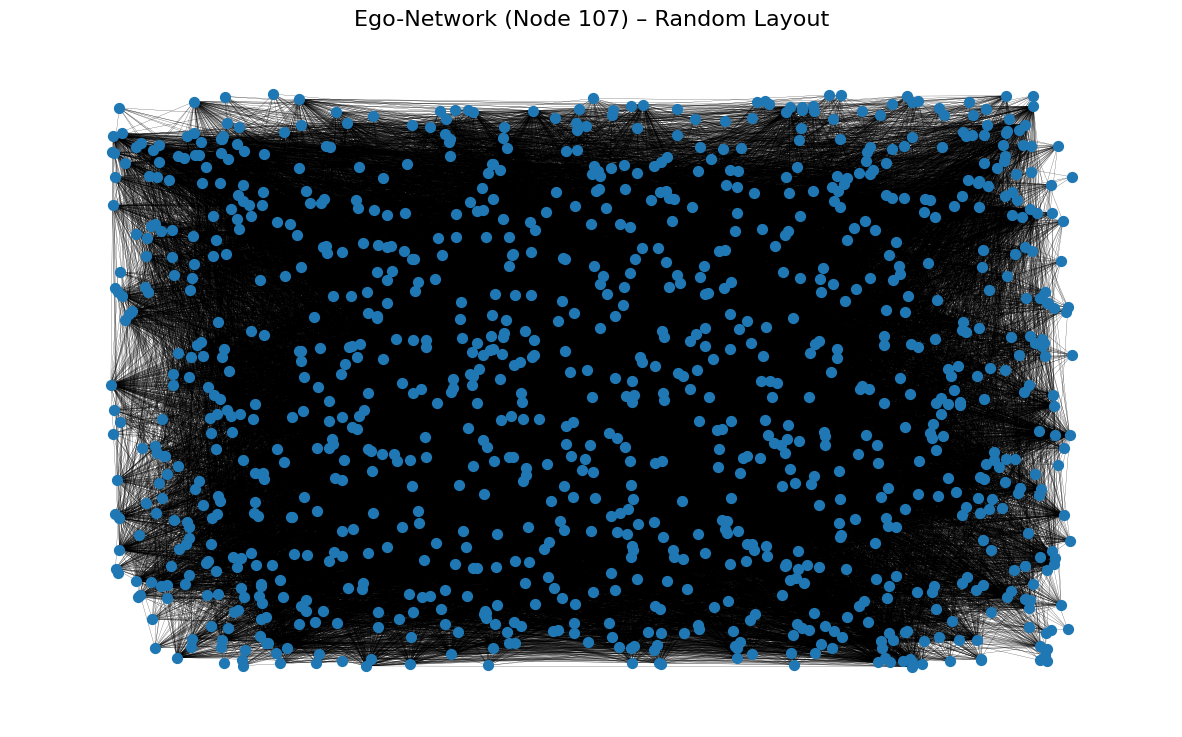

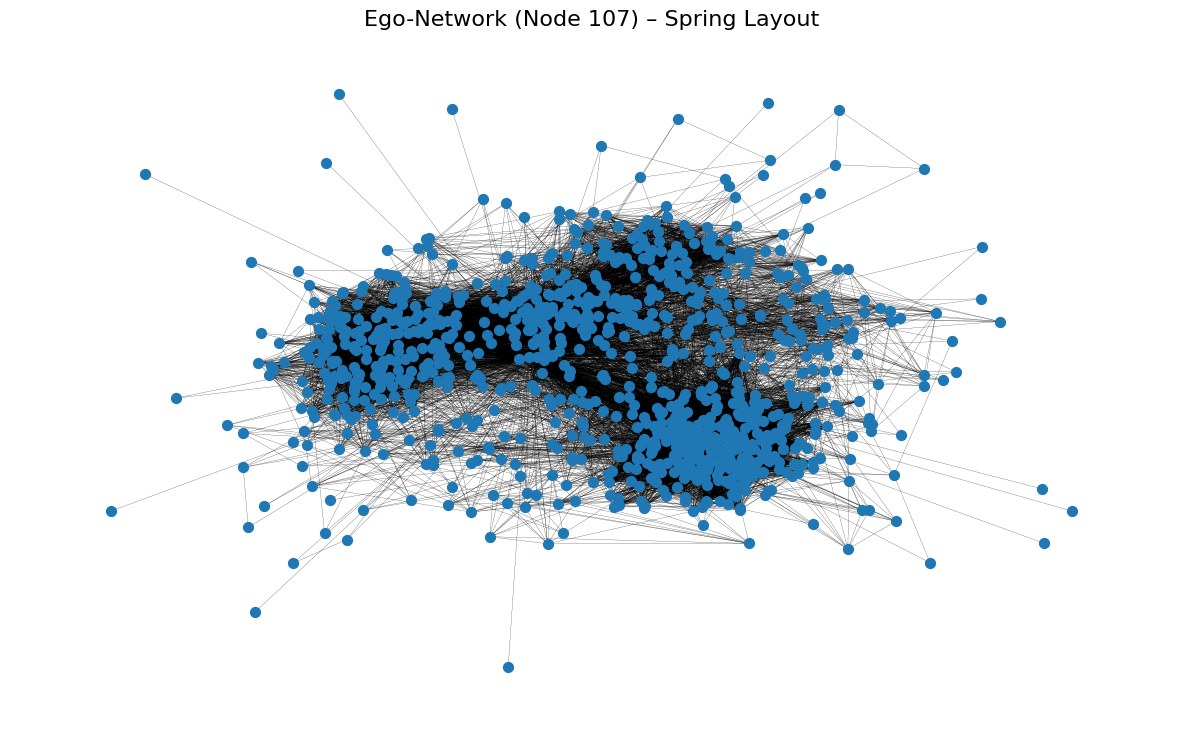


[SUMMARY STATISTICS]
{'Ego Node': 107, 'Number of nodes': 1046, 'Number of edges': 27795, 'Graph Density': 0.05085676123212603, 'Average Degree': 53.1453154875717, 'Number of connected components': 1}


In [ ]:
import gzip
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the file in your Google Drive
file_path = '/content/drive/MyDrive/facebook_combined.txt/facebook_combined.txt'

# Check if the file is a valid Gzip file
try:
    with gzip.open(file_path, 'rb') as f:
        file_content = f.read(100)
    print("File is a valid Gzip.")
    facebook = pd.read_csv(
        file_path,
        compression="gzip",
        sep=" ",
        names=["start_node", "end_node"],
    )
except Exception as e:
    print(f"Error: {e}")
    print("File is not a valid Gzip file. Trying without gzip compression...")

    facebook = pd.read_csv(
        file_path,
        sep=" ",
        names=["start_node", "end_node"],
    )

# Display the first few rows of the dataframe
print(facebook.head())

# Check for duplicates
print(f"Number of duplicate rows: {facebook.duplicated().sum()}")

# Create the full graph
G_full = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

# -----------------------------
# ✅ Task 1: Use Ego-Network of Node 107
# -----------------------------
ego_node = 107

if ego_node not in G_full:
    raise ValueError(f"Node {ego_node} not found in the graph.")

# Extract the ego-network centered on node 107
G = nx.ego_graph(G_full, ego_node)

# Basic Graph Info
print(f"\n[INFO] Ego-Network of Node {ego_node}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
components = list(nx.connected_components(G))
degrees = [d for _, d in G.degree()]

print(f"Graph Density: {density}")
print(f"Average Degree: {avg_degree}")
print(f"Number of connected components: {len(components)}")


# Visualization 1: Random Layout
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 50, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)
plt.title(f"Ego-Network (Node {ego_node}) – Random Layout", fontsize=16)
plt.savefig(f"ego_network_node_{ego_node}_random_layout.png")
plt.show()
plt.close()

# Visualization 2: Spring Layout
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
pos = nx.spring_layout(G, iterations=15, seed=1721)
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.title(f"Ego-Network (Node {ego_node}) – Spring Layout", fontsize=16)
plt.savefig(f"ego_network_node_{ego_node}_spring_layout.png")
plt.show()
plt.close()

# Save stats
stats = {
    "Ego Node": ego_node,
    "Number of nodes": G.number_of_nodes(),
    "Number of edges": G.number_of_edges(),
    "Graph Density": density,
    "Average Degree": avg_degree,
    "Number of connected components": len(components),
}
print("\n[SUMMARY STATISTICS]")
print(stats)


Degree Centrality

In [ ]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 1.0),
 (1888, 0.2430622009569378),
 (1800, 0.23444976076555024),
 (1663, 0.22488038277511962),
 (1352, 0.22392344497607655),
 (1730, 0.21626794258373205),
 (1431, 0.2105263157894737),
 (1199, 0.2076555023923445)]

In [ ]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1888, 254),
 (1800, 245),
 (1663, 235),
 (1352, 234),
 (1730, 226),
 (1431, 220),
 (1199, 217)]

Text(0, 0.5, 'Counts')

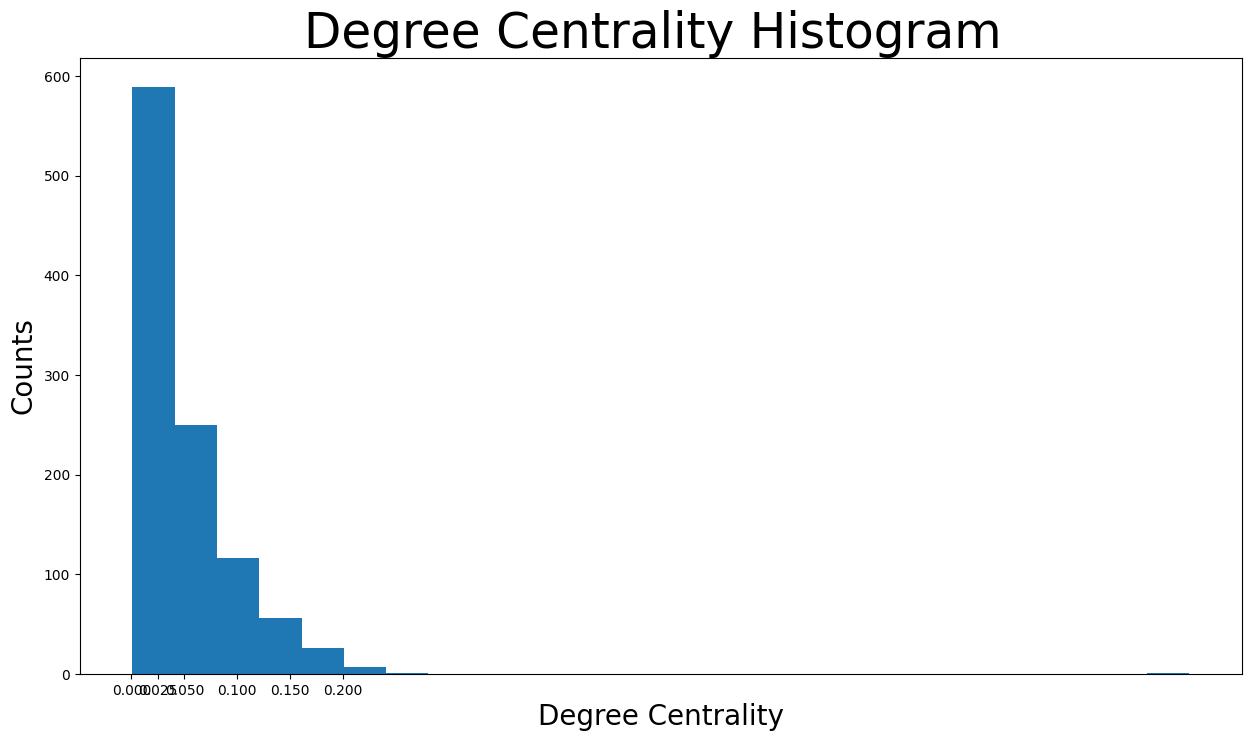

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [ ]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 10))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.savefig("Degree Centrality.png", format="PNG", bbox_inches="tight")
plt.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Betweenness Centrality

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.7743180063868615),
 (483, 0.006301104333450163),
 (1086, 0.005259170929839954),
 (917, 0.003560431775349363),
 (1584, 0.0030699212449848295),
 (1783, 0.00243793629798512),
 (1431, 0.002303804734270967),
 (1800, 0.0019645797068676947)]

Text(0, 0.5, 'Counts')

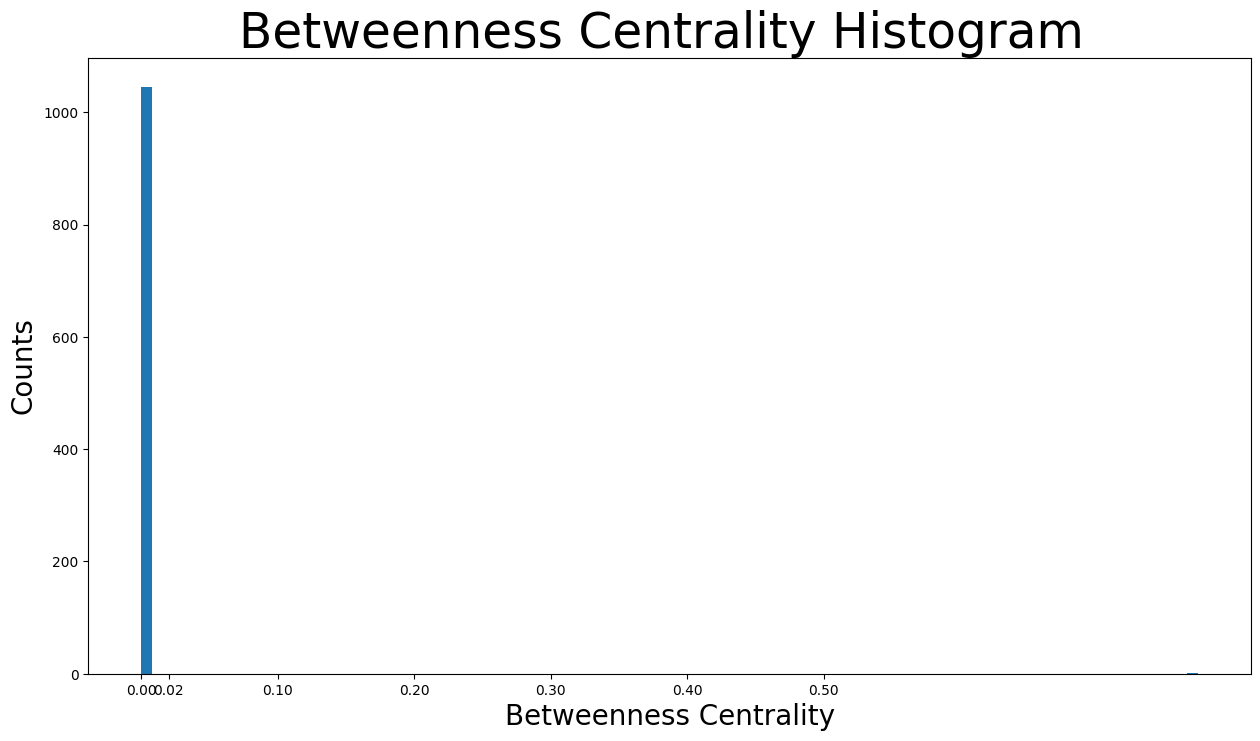

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [ ]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.savefig("Betweenness.png", format="PNG", bbox_inches="tight")
plt.close()

Closeness Centrality

In [ ]:
closeness_centrality = nx.centrality.closeness_centrality(
    G
)  # save results in a variable to use again
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 1.0),
 (1888, 0.5691721132897604),
 (1800, 0.5663956639566395),
 (1663, 0.5633423180592992),
 (1352, 0.5630387931034483),
 (1730, 0.5606223175965666),
 (1431, 0.5588235294117647),
 (1199, 0.5579284570208222)]

In [ ]:
1 / closeness_centrality[107]

1.0

Text(0, 0.5, 'Counts')

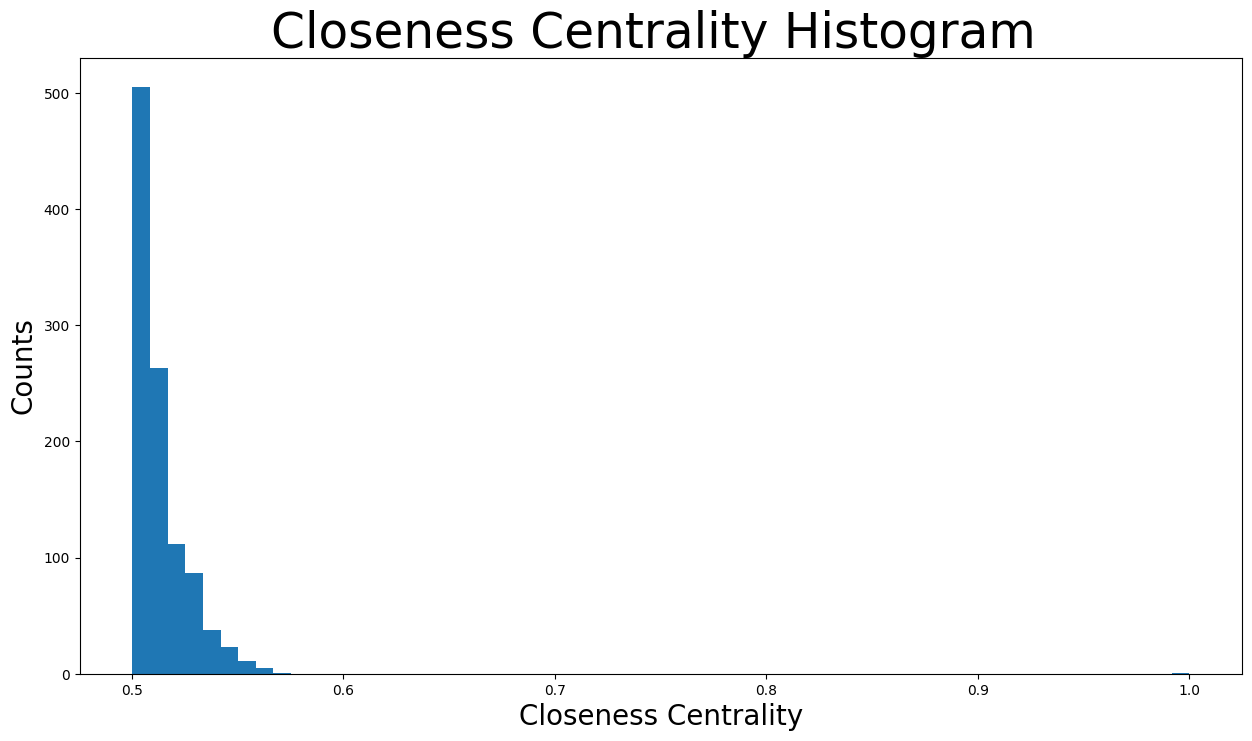

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [ ]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.savefig("Closeness.png", format="PNG", bbox_inches="tight")
plt.close()

Eigenvector Centrality

In [ ]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(
    G
)  # save results in a variable to use again
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(107, 0.13796327274074233),
 (1888, 0.11454505984095911),
 (1800, 0.11042834988992775),
 (1663, 0.10766665433675489),
 (1352, 0.10667670244662715),
 (1431, 0.10296582112351749),
 (1199, 0.10286341503908411),
 (1730, 0.1008648426204591),
 (1589, 0.10013849800128533),
 (1746, 0.09790592735950107)]

In [ ]:
high_eigenvector_centralities = (
    sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
)[
    1:10
]  # 2nd to 10th nodes with heighest eigenvector centralities
high_eigenvector_nodes = [
    tuple[0] for tuple in high_eigenvector_centralities
]  # set list as [1888, 1800, 1663, 1352, 1431, 1199, 1730, 1589, 1746]
neighbors_107 = [n for n in G.neighbors(107)]  # list with all nodes connected to 1912
all(
    item in neighbors_107 for item in high_eigenvector_nodes
)  # check if items in list high_eigenvector_nodes exist in list neighbors_1912

True

Text(0, 0.5, 'Counts')

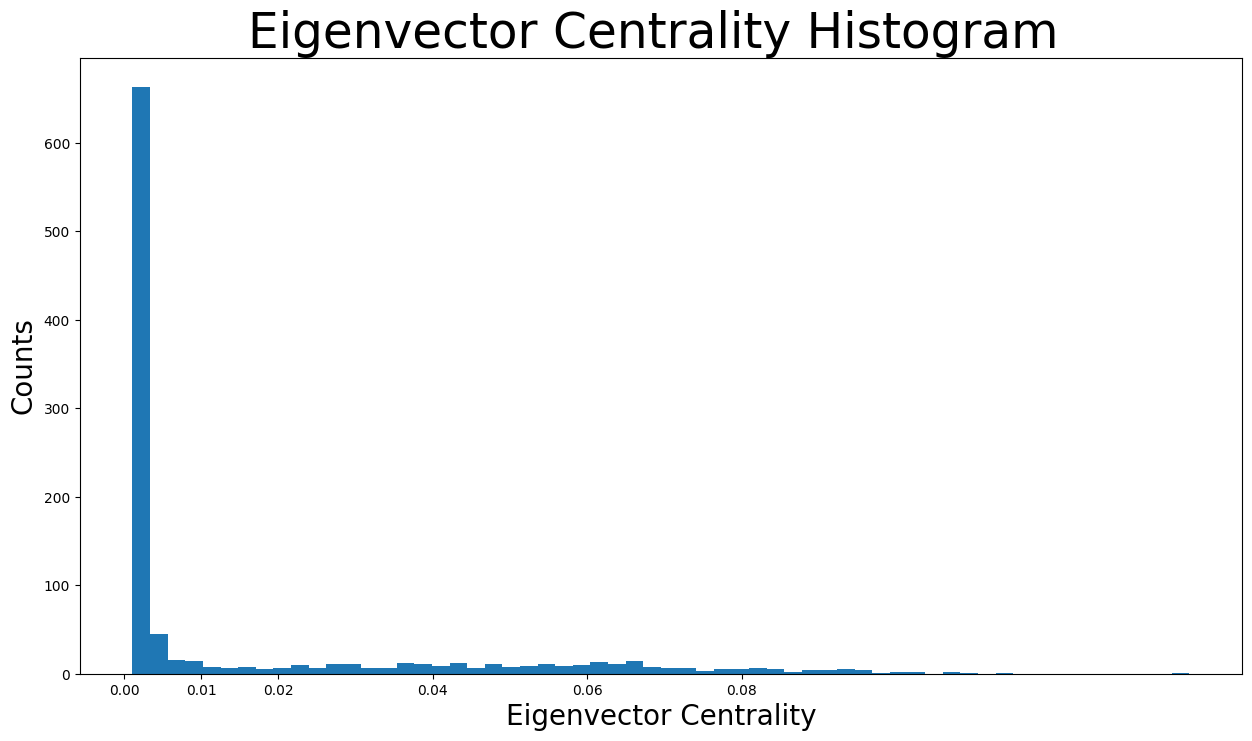

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [ ]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.savefig("Eigenvector.png", format="PNG", bbox_inches="tight")
plt.close()

Top Influencers Output

In [ ]:
def print_top_influencers(centrality_dict, centrality_name, top_n=10):
    print(f"\nTop {top_n} users by {centrality_name}:")
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    for rank, (node, score) in enumerate(sorted_centrality[:top_n], start=1):
        print(f"{rank}. User ID: {node}, {centrality_name}: {score:.6f}")

# Top influencers by Degree Centrality
print_top_influencers(degree_centrality, "Degree Centrality")

# Top influencers by Betweenness Centrality
print_top_influencers(betweenness_centrality, "Betweenness Centrality")

# Top influencers by Closeness Centrality
print_top_influencers(closeness_centrality, "Closeness Centrality")

# Top influencers by Eigenvector Centrality
print_top_influencers(eigenvector_centrality, "Eigenvector Centrality")



Top 10 users by Degree Centrality:
1. User ID: 107, Degree Centrality: 1.000000
2. User ID: 1888, Degree Centrality: 0.243062
3. User ID: 1800, Degree Centrality: 0.234450
4. User ID: 1663, Degree Centrality: 0.224880
5. User ID: 1352, Degree Centrality: 0.223923
6. User ID: 1730, Degree Centrality: 0.216268
7. User ID: 1431, Degree Centrality: 0.210526
8. User ID: 1199, Degree Centrality: 0.207656
9. User ID: 1584, Degree Centrality: 0.201914
10. User ID: 1768, Degree Centrality: 0.200000

Top 10 users by Betweenness Centrality:
1. User ID: 107, Betweenness Centrality: 0.774318
2. User ID: 483, Betweenness Centrality: 0.006301
3. User ID: 1086, Betweenness Centrality: 0.005259
4. User ID: 917, Betweenness Centrality: 0.003560
5. User ID: 1584, Betweenness Centrality: 0.003070
6. User ID: 1783, Betweenness Centrality: 0.002438
7. User ID: 1431, Betweenness Centrality: 0.002304
8. User ID: 1800, Betweenness Centrality: 0.001965
9. User ID: 1888, Betweenness Centrality: 0.001770
10. Use

Louvain Community Detection

In [ ]:
!pip install python-louvain


Number of communities detected: 6


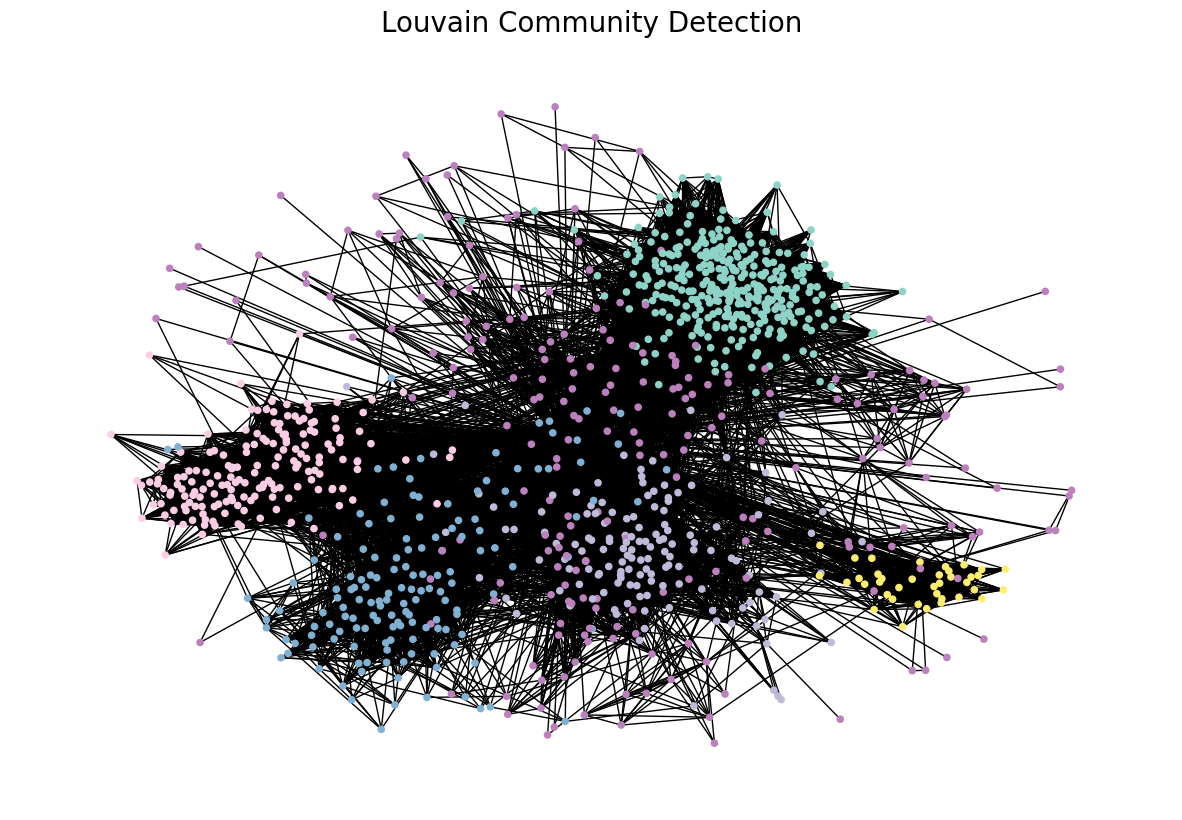

In [ ]:
# Apply Louvain algorithm
# partition = community_louvain.best_partition(G) # Original line
from community import community_louvain # Correct import for the Louvain algorithm

partition = community_louvain.best_partition(G)

# Number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
nx.draw_networkx(G, pos=pos, node_color=colors, node_size=20, with_labels=False, cmap=plt.cm.Set3)
plt.title("Louvain Community Detection", fontsize=20)
plt.axis('off')
plt.show()
plt.savefig("Louvain Community Detection.png", format="PNG", bbox_inches="tight")
plt.close()


Top Central Users

In [ ]:
# Get top N users for each centrality measure
def get_top_users(centrality_dict, top_n=10):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

top_n = 10
top_users_degree = get_top_users(degree_centrality, top_n)
top_users_betweenness = get_top_users(betweenness_centrality, top_n)
top_users_closeness = get_top_users(closeness_centrality, top_n)
top_users_eigenvector = get_top_users(eigenvector_centrality, top_n)

# Print which community each top user belongs to
def print_user_communities(top_users, centrality_name):
    print(f"\n{centrality_name} - Top {top_n} Users and Their Communities:")
    for user, score in top_users:
        community = partition.get(user, "N/A")
        print(f"User ID: {user}, Score: {score:.6f}, Community: {community}")

print_user_communities(top_users_degree, "Degree Centrality")
print_user_communities(top_users_betweenness, "Betweenness Centrality")
print_user_communities(top_users_closeness, "Closeness Centrality")
print_user_communities(top_users_eigenvector, "Eigenvector Centrality")



Degree Centrality - Top 10 Users and Their Communities:
User ID: 107, Score: 1.000000, Community: 4
User ID: 1888, Score: 0.243062, Community: 0
User ID: 1800, Score: 0.234450, Community: 0
User ID: 1663, Score: 0.224880, Community: 0
User ID: 1352, Score: 0.223923, Community: 0
User ID: 1730, Score: 0.216268, Community: 0
User ID: 1431, Score: 0.210526, Community: 0
User ID: 1199, Score: 0.207656, Community: 0
User ID: 1584, Score: 0.201914, Community: 0
User ID: 1768, Score: 0.200000, Community: 0

Betweenness Centrality - Top 10 Users and Their Communities:
User ID: 107, Score: 0.774318, Community: 4
User ID: 483, Score: 0.006301, Community: 1
User ID: 1086, Score: 0.005259, Community: 0
User ID: 917, Score: 0.003560, Community: 3
User ID: 1584, Score: 0.003070, Community: 0
User ID: 1783, Score: 0.002438, Community: 3
User ID: 1431, Score: 0.002304, Community: 0
User ID: 1800, Score: 0.001965, Community: 0
User ID: 1888, Score: 0.001770, Community: 0
User ID: 1730, Score: 0.001769